## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [15]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [2]:
# Execute this cell for loading dataset in a pandas dataframe
import pandas as pd
from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2025-12-17 16:05:13--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.68.139, 74.125.68.138, 74.125.68.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.68.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2025-12-17 16:05:13--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.68.132, 2404:6800:4003:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.68.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  --.-KB/s

In [3]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [8]:
data_df['date'] = data_df["date"].str.replace("T000000","")                                        # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_df = data_df.drop("id", axis=1)
#sice we want an array
data_array= data_df.to_numpy()                                            # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [13]:
import numpy as np
data_df = data_df.astype("float32") # This converts the DataFrame's columns to float
mean =np.array(data_df.agg("mean"))                              # mean is calculated from the now all-float data_df
sd = np.array(data_df.agg("std"))                                  # sd is calculated from the now all-float data_df

# Re-create data_array (or a new array) from the numeric data_df for normalization
data_array_numeric = data_df.to_numpy()

data_array_norm = (data_array_numeric - mean)/sd # Now perform operations on the fully numeric array

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [16]:
labels = data_df["price"].to_numpy()                                                                                          # extract the price column from data

x_array_norm = np.delete(data_array_norm, 1, 1)                                                                                                    # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [25]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred - y_true)**2) # Corrected to calculate mean squared error

  return mse

In [19]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.array([np.sum(a*x[i] + b) for i in range(m)])                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [26]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  error = yp - y_true # This is a vector of shape (m,)

  # Gradient with respect to weights 'a'
  # da = (2/m) * X.T @ (Y_pred - Y_true)
  da = (2/m) * np.dot(x.T, error)

  # Gradient with respect to bias 'b'
  # db = (2/m) * sum(Y_pred - Y_true)
  db = (2/m) * np.sum(error)

  assert(da.shape == (n,))
  # db is a scalar, no need for a shape assertion like (n,)
  return (da,db)

In [23]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.random.rand(n)*0.01                                     # initialize a- weights and b- bias
  b = 0.0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    da,db = gradient(x,a,b,y_true)
    a = a - learning_rate*da
    b = b - learning_rate*db

    l_mse = loss(y(x,a,b), y_true)
    # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [36]:
epochs = 250               # tweak this!!!
learn_rate = 0.001          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,
                                  learning_rate=learn_rate,
                                  epochs=epochs)

Epoch  1  Completed! loss =  398410652685.5285
Epoch  2  Completed! loss =  377121650627.6857
Epoch  3  Completed! loss =  357345793427.08044
Epoch  4  Completed! loss =  338971561722.62634
Epoch  5  Completed! loss =  321895725614.3806
Epoch  6  Completed! loss =  306022727133.69977
Epoch  7  Completed! loss =  291264108743.9905
Epoch  8  Completed! loss =  277537984440.38306
Epoch  9  Completed! loss =  264768550272.50742
Epoch  10  Completed! loss =  252885631351.32278
Epoch  11  Completed! loss =  241824262620.07574
Epoch  12  Completed! loss =  231524300872.24457
Epoch  13  Completed! loss =  221930065686.99207
Epoch  14  Completed! loss =  212990007126.32523
Epoch  15  Completed! loss =  204656398198.8838
Epoch  16  Completed! loss =  196885050244.0225
Epoch  17  Completed! loss =  189635049527.50497
Epoch  18  Completed! loss =  182868513467.51672
Epoch  19  Completed! loss =  176550365027.59595
Epoch  20  Completed! loss =  170648123922.1863
Epoch  21  Completed! loss =  165131

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  60628689970.02953


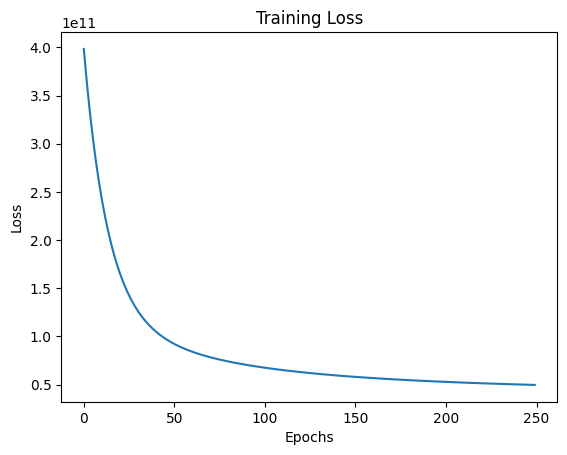

In [42]:
test_loss = loss(y(x_test,a,b), y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss
plt.plot(range(len(train_loss)), train_loss)                  # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()